<a href="https://colab.research.google.com/github/RatchanonPa/Data-Warehouse-and-Big-Data-Analytics/blob/main/Firefox_Text_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 1: Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="500" />

ชื่อกลุ่ม: Firefox

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. นายรัชชานนท์ พันกาฬสินธุ์
2. นางสาวพรวลัย ฟ็อกซ์ออล
3. นางสาวธมน ศิริพราหม

กำหนดส่ง: พุธ 18 กันยายน 2567 \
รายงานในชั้นเรียน: พฤหัสบดี 19 กันยายน 2567

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นในรูปแบบข้อความก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลตัวอักษรเบื้องต้นและสร้าง Data Visualization ที่เหมาะสมได้
----------------------

In [ ]:
"""
หากไม่สามารถลง library ใด ให้ดาวน์โหลดดังตัวอย่างต่อไปนี้
!pip3 install numpy
!pip install nltk
!pip3 install wordcloud
"""
# Load these libraries
import json
import pprint
import pandas as pd
import numpy as np
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Working with Twitter Data and JSON file
จากข้อมูลทวิตเตอร์เกี่ยวกับประเทศไทยที่เก็บในวันที่ 31 สิงหาคม 2565 ในรูปแบบ JSON จาก `thailand_tweets.txt` ซึ่งมีการดึงข้อมูลมาด้วยคีเวิร์ด "Thailand" ให้ทำการศึกษาข้อมูลและดึงค่าจากข้อมูล \
ทั้งนี้เราสามารถเรียกหน้าทวีตจาก tweet ID ได้ดังนี้
```
twitter.com/anyuser/status/<tweet_id>
```
หมายเหตุ: ไม่ต้องนำเสนอข้อนี้

#### Read JSON file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_content = '/content/drive/MyDrive/Data Warehouse/thailand_tweets.txt'

In [ ]:
# ----------------- Your code here -----------------
# Step 1: Load the JSON file
with open('/content/drive/MyDrive/Data Warehouse/thailand_tweets.txt', 'r', encoding='utf-8') as file:
    file_content = file.read()  # Read file content as string

# Debug: Print the first 500 characters to see the format
print(file_content[:500])

# Check if it's valid JSON by parsing
try:
    twitter_data = json.loads(file_content)
    print("File loaded successfully!")
except json.JSONDecodeError as e:
    print(f"JSON decoding failed: {e}")

twitter_data = json.loads(twitter_data)

for tweet_id, tweet_info in twitter_data.items():
    print(f"Tweet ID: {tweet_info['tweet_id']}")
    print(f"Username: {tweet_info['username']}")
    print(f"Content: {tweet_info['content']}")

"{\"1564764893038882816\": {\"tweet_id\": \"1564764893038882816\", \"username\": \"matthunter\", \"name\": \"MATT HUNT\\u039eR\", \"profile_picture\": \"https://twitter.com/matthunter/photo\", \"replies\": 2, \"retweets\": 1, \"likes\": 7, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:59:57+00:00\", \"content\": \"Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. \", \"hashtags\": [], \"mentions\": [], \"images\": [], \"videos\": [], \"tw
File loaded successfully!
Tweet ID: 1564764893038882816
Username: matthunter
Content: Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 
Tweet ID: 1564764866598080513
Username: DavSmithVP
Content: Tomb Raider Underworld | Thailand 
#VirtualPhotography 
@tombraider
 @crystaldynamics
Tweet ID: 1564764845685280772
Username: DailyPattaya
Content: The latest The Pattaya Daily! http://thepattayadaily.com Thanks to 
@PopeKael
 @ASEANNOWTH
 #thailand #pat

#### Inspect data in JSON format (either reading using pretty print or Pandas data frame)

In [ ]:
# ----------------- Your code here -----------------
# Pretty print the parsed JSON
pprint.pprint(twitter_data, indent=2)

{ '1564761905410875392': { 'content': 'Tinggal cari duitnya aja ini mah kalo '
                                      'di Thailand bisa pake Qris',
                           'hashtags': [],
                           'images': [],
                           'is_retweet': False,
                           'likes': 0,
                           'link': '',
                           'mentions': [],
                           'name': '',
                           'posted_time': '2022-08-30T23:48:04+00:00',
                           'profile_picture': 'https://twitter.com/moanfIeur/photo',
                           'replies': 0,
                           'retweets': 0,
                           'tweet_id': '1564761905410875392',
                           'tweet_url': 'https://twitter.com/moanfIeur/status/1564761905410875392',
                           'username': 'moanfIeur',
                           'videos': []},
  '1564761944061382656': { 'content': 'Padahal berharap pertama la

In [ ]:
# Convert the nested dictionary to a list of dictionaries
tweets_list = [tweet for tweet in twitter_data.values()]

# Create DataFrame
df = pd.DataFrame(tweets_list)
df


,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
0,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30T23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
1,1564764866598080513,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30T23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2,1564764845685280772,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30T23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
3,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30T23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
4,1564764468277612549,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30T23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,
5,1564764445825458181,OhmPawatInter,OhmPawat International,https://twitter.com/OhmPawatInter/photo,0,99,143,False,2022-08-30T23:58:10+00:00,Trend twitter update \n\nTop Twitter influence...,"[4, ohmpawat, ย]",[ohmpawatt],[https://pbs.twimg.com/media/Fbco99jWIAEd3Oe?f...,[],https://twitter.com/OhmPawatInter/status/15647...,
6,1564764361742110720,nato_tonyo11,nutri(BUSY SI ENGR.)| SoliD,https://twitter.com/nato_tonyo11/photo,0,2,18,False,2022-08-30T23:57:50+00:00,Good morning world! And goodmorning to you to...,[DonnyPangilinan],[],[],[],https://twitter.com/nato_tonyo11/status/156476...,
7,1564764274098323456,ThThitikarn61,thiti,https://twitter.com/ThThitikarn61/photo,0,0,0,False,2022-08-30T23:57:29+00:00,Listening to #faraway the title track of #theo...,"[faraway, theotherside, MarkTuan]",[marktuan],[],[],https://twitter.com/ThThitikarn61/status/15647...,
8,1564764028014313472,Livetradingnews,Knightly News,https://twitter.com/Livetradingnews/photo,0,2,3,False,2022-08-30T23:56:30+00:00,With the recent news of the SCB X-Bitkub deal ...,[],[],[],[],https://twitter.com/Livetradingnews/status/156...,
9,1564763907700531202,DiscoverSoc,Discover Society,https://twitter.com/DiscoverSoc/photo,0,1,0,False,2022-08-30T23:56:02+00:00,#ICYMI On the Frontline. Crude Power in Thail...,[ICYMI],[],[],[],https://twitter.com/DiscoverSoc/status/1564763...,https://t.co/OYQzv4BSm9


#### Report: จงตอบคำถามต่อไปนี้
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data:
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts  
* Display the top 5 tweets that are the most popular among your collection \
สามารถใช้ `np.argsort(<list>)[:5]` ซึ่งจะแสดงผล indices ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ `np.argsort(<list>)[::-1][:5]` จะแสดงผล indices ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

1. Total number of tweets: 29
2. Content of the first tweet: Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 
3. First tweet hashtags: []
   First tweet mentions: []
4. Hashtags related to Thailand: ['thailand', 'Thailand']
5 & 6. Top 5 most popular tweets:
1. Tweet by OhmPawatInter: Trend twitter update 

Top Twitter influencers in ... (Popularity: 242)
2. Tweet by Zeepruk_jfc: Can you help me?

tracking number
FMP200001150XX

... (Popularity: 88)
3. Tweet by o_rung_o1: วันนี้วันสุดท้ายของการโหวต รางวัล Outstanding Asia... (Popularity: 43)
4. Tweet by nato_tonyo11: Good morning  world! And goodmorning to you too #D... (Popularity: 20)
5. Tweet by Jay_beebee: พร้อมครัช

Please,come to thailand.
 

#JAYB #제이비 ... (Popularity: 15)


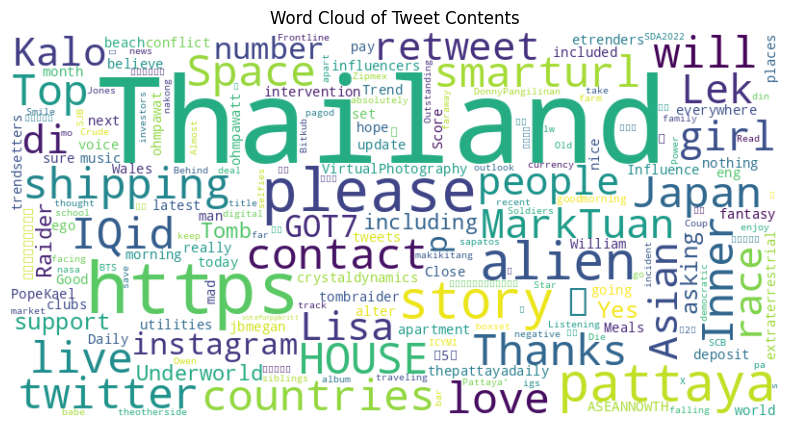

Note: This word cloud may not be a good representation of Thailand due to the small data size.


In [ ]:
# ----------------- Your code here -----------------
from collections import Counter

# Convert to DataFrame
tweets_list = [tweet for tweet in twitter_data.values()]
df = pd.DataFrame(tweets_list)

# 1. Total number of tweets
total_tweets = len(df)
print(f"1. Total number of tweets: {total_tweets}")

# 2. Content of the first tweet
first_tweet_content = df.iloc[0]['content']
print(f"2. Content of the first tweet: {first_tweet_content}")

# 3. Hashtags and mentions in the first tweet
first_tweet_hashtags = df.iloc[0]['hashtags']
first_tweet_mentions = df.iloc[0]['mentions']
print(f"3. First tweet hashtags: {first_tweet_hashtags}")
print(f"   First tweet mentions: {first_tweet_mentions}")

# 4. Hashtags related to Thailand
thailand_hashtags = [hashtag for tweet_hashtags in df['hashtags'] for hashtag in tweet_hashtags if 'thailand' in hashtag.lower()]
print(f"4. Hashtags related to Thailand: {thailand_hashtags}")

# 5 & 6. Most popular tweets
df['popularity'] = df['replies'] + df['retweets'] + df['likes']
top_5_indices = np.argsort(df['popularity'].values)[::-1][:5]
print("5 & 6. Top 5 most popular tweets:")
for i, idx in enumerate(top_5_indices, 1):
    print(f"{i}. Tweet by {df.iloc[idx]['username']}: {df.iloc[idx]['content'][:50]}... (Popularity: {df.iloc[idx]['popularity']})")

# 7. Word cloud
all_words = ' '.join(df['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweet Contents')
plt.show()

print("Note: This word cloud may not be a good representation of Thailand due to the small data size.")

## Problem 2: Study Collected Yelp Reviews

![](https://techcrunch.com/wp-content/uploads/2022/08/Yelp-Android_Full-Experience.jpg?w=1390&crop=1)

ดาวน์โหลด Yelp dataset เกี่ยวกับรีวิวของผู้ใช้บริการธุรกิจต่าง ๆ จาก https://www.yelp.com/dataset
<br>
รายละเอียดข้อมูล https://www.yelp.com/dataset/documentation/main
<br>
ให้ศึกษาข้อมูลจากไฟล์ yelp_academic_dataset_review.json, yelp_academic_dataset_business.json, และ yelp_academic_dataset_user.json

### อ่านข้อมูล Reviews, Businesses, และ Users เป็นจำนวน 100,000 รีวิว

In [ ]:
# เปลี่ยน path ของ working directory เช่น ที่ไหนใน Google Drive
myDirectory = "/content/drive/MyDrive/Data Warehouse/yelp_dataset/"
reviewFilePath = "yelp_academic_dataset_review.json"
businessFilePath = "yelp_academic_dataset_business.json"
userFilePath = "yelp_academic_dataset_user.json"

อ่านข้อมูล review

In [ ]:
# prompt: โหลด yelp_academic_dataset_business.json เป็น jason

with open(myDirectory + businessFilePath, 'r', encoding='utf-8') as f:
    business_data = []
    for line in f:
        try:
            business_data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"JSON decoding failed: {e}")
            continue

business_data


[{'business_id': 'Pns2l4eNsfO8kk83dixA6A',
  'name': 'Abby Rappoport, LAC, CMQ',
  'address': '1616 Chapala St, Ste 2',
  'city': 'Santa Barbara',
  'state': 'CA',
  'postal_code': '93101',
  'latitude': 34.4266787,
  'longitude': -119.7111968,
  'stars': 5.0,
  'review_count': 7,
  'is_open': 0,
  'attributes': {'ByAppointmentOnly': 'True'},
  'categories': 'Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists',
  'hours': None},
 {'business_id': 'mpf3x-BjTdTEA3yCZrAYPw',
  'name': 'The UPS Store',
  'address': '87 Grasso Plaza Shopping Center',
  'city': 'Affton',
  'state': 'MO',
  'postal_code': '63123',
  'latitude': 38.551126,
  'longitude': -90.335695,
  'stars': 3.0,
  'review_count': 15,
  'is_open': 1,
  'attributes': {'BusinessAcceptsCreditCards': 'True'},
  'categories': 'Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services',
  'hours': {'Monday': '0:0-0:0',
   'Tuesday': '8:0-18:30',
   'Wednes

In [ ]:
# ----------------- Your code here -----------------
# Step 1: Load the JSON file
with open('/content/drive/MyDrive/Data Warehouse/thailand_tweets.txt', 'r', encoding='utf-8') as file:
    file_content = file.read()  # Read file content as string

# Debug: Print the first 500 characters to see the format
print(file_content[:500])

# Check if it's valid JSON by parsing
try:
    twitter_data = json.loads(file_content)
    print("File loaded successfully!")
except json.JSONDecodeError as e:
    print(f"JSON decoding failed: {e}")

twitter_data = json.loads(twitter_data)

for tweet_id, tweet_info in twitter_data.items():
    print(f"Tweet ID: {tweet_info['tweet_id']}")
    print(f"Username: {tweet_info['username']}")
    print(f"Content: {tweet_info['content']}")

"{\"1564764893038882816\": {\"tweet_id\": \"1564764893038882816\", \"username\": \"matthunter\", \"name\": \"MATT HUNT\\u039eR\", \"profile_picture\": \"https://twitter.com/matthunter/photo\", \"replies\": 2, \"retweets\": 1, \"likes\": 7, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:59:57+00:00\", \"content\": \"Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. \", \"hashtags\": [], \"mentions\": [], \"images\": [], \"videos\": [], \"tw
File loaded successfully!
Tweet ID: 1564764893038882816
Username: matthunter
Content: Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 
Tweet ID: 1564764866598080513
Username: DavSmithVP
Content: Tomb Raider Underworld | Thailand 
#VirtualPhotography 
@tombraider
 @crystaldynamics
Tweet ID: 1564764845685280772
Username: DailyPattaya
Content: The latest The Pattaya Daily! http://thepattayadaily.com Thanks to 
@PopeKael
 @ASEANNOWTH
 #thailand #pat

In [ ]:
# We only use the first 100,000 reviews
n = 100000
reviews = []
with open(myDirectory+reviewFilePath) as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        if i+1 >= n:
            break
reviews = pd.DataFrame(reviews)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float64
 4   useful       100000 non-null  int64  
 5   funny        100000 non-null  int64  
 6   cool         100000 non-null  int64  
 7   text         100000 non-null  object 
 8   date         100000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


อ่านข้อมูล business

In [ ]:
businesses = []
with open(myDirectory+businessFilePath) as fl:
    for i, line in enumerate(fl):
        businesses.append(json.loads(line))
businesses = pd.DataFrame(businesses)
businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


อ่านข้อมูล user

In [ ]:
users = []
with open(myDirectory+userFilePath) as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
users = pd.DataFrame(users)
users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


### รวมข้อมูล Reviews, Businesses, และ Users และสำรวจตัวแปรในข้อมูล

In [ ]:
# join reviews and businesses data using inner join
df = pd.merge(reviews, businesses, on='business_id', suffixes=('_review', '_business'))
# join reviews-businesses and users data using inner join
df = pd.merge(df, users, on='user_id', suffixes=('_review_business', '_user'))
df

,review_id,user_id,business_id,stars_review,useful_review_business,funny_review_business,cool_review_business,text,date,name_review_business,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,0,0,0,0,0,0,1,1,0,0
1,PBIeDysdBxwY53IFnOPyUw,mh_-eMZ6K5RLWhZyISBhwA,d_tRshM-w6S4QxE4VVi8tQ,3.0,0,0,0,"Jones is definitely average quality, not many ...",2017-03-05 14:26:14,Jones,...,0,0,0,0,0,0,1,1,0,0
2,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,0,0,0,This is the second time we tried turning point...,2017-05-13 17:06:55,Turning Point of North Wales,...,0,0,0,0,0,0,0,0,0,0
3,S6pQZQocMB1WHMjTRbt77A,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4.0,2,0,1,The place is cute and the staff was very frien...,2017-08-08 00:58:18,Turning Point of North Wales,...,0,0,0,0,1,1,0,0,1,4
4,7iReVDHvucme_cHIHYqmvg,ejFxLGqQcWNLdNByJlIhnQ,0mijbNf-7wiKJ9xto1pAyg,5.0,1,1,1,Best meal in a while! Chef Jen Carroll's new r...,2018-09-29 08:49:24,Spice Finch,...,0,0,0,0,1,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1BVRCPMy8sFLsWqRhBMA6Q,_h3ku94dHfDMlSrvYAwjjw,fPIcpUdc-2Sh2GIs3U07AA,5.0,1,0,0,Came in here and Bought the Resort Series Mona...,2014-08-15 01:29:45,Four Seasons Spa and Pool,...,0,0,0,0,0,0,0,0,0,0
99996,EftiL50cJdnZF5IH3bOPXg,lfGCCQWdxjhNstsE0w1AZQ,DCDngTtKm7ZAOLPvbX0_9g,5.0,0,0,0,Ali and his team always get the job done right...,2017-10-17 11:34:44,American Auto Repair & Getty,...,0,0,0,0,0,0,0,0,0,0
99997,RPWdAWWNlfbAvsDSWWvcfw,haqCShLJpKwjwW8xvw2Rgw,ckz5dDRKVRIX3bdI8KuMzQ,5.0,0,0,0,We rented a table and pirogue for a crawfish b...,2018-04-06 13:39:33,Chaps Party Rental,...,0,0,0,0,0,0,0,0,0,0
99998,e2Qovy06cMXwjRVmgqLI2A,dkMWfuUoXHM1wh-dPZoKHQ,t4sNPmBlDoYwJQD4CnW72Q,5.0,0,0,0,The best pizza I have ever had hands down my f...,2016-04-02 02:59:32,Versato's Pizza,...,0,0,0,0,0,0,0,0,0,0


### ทำการสำรวจข้อมูลเบื้องต้น

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   review_id                     100000 non-null  object 
 1   user_id                       100000 non-null  object 
 2   business_id                   100000 non-null  object 
 3   stars_review                  100000 non-null  float64
 4   useful_review_business        100000 non-null  int64  
 5   funny_review_business         100000 non-null  int64  
 6   cool_review_business          100000 non-null  int64  
 7   text                          100000 non-null  object 
 8   date                          100000 non-null  object 
 9   name_review_business          100000 non-null  object 
 10  address                       100000 non-null  object 
 11  city                          100000 non-null  object 
 12  state                         100000 non-null

สำรวจการแจกแจงของจำนวนรีวิวที่แต่ละ user ให้

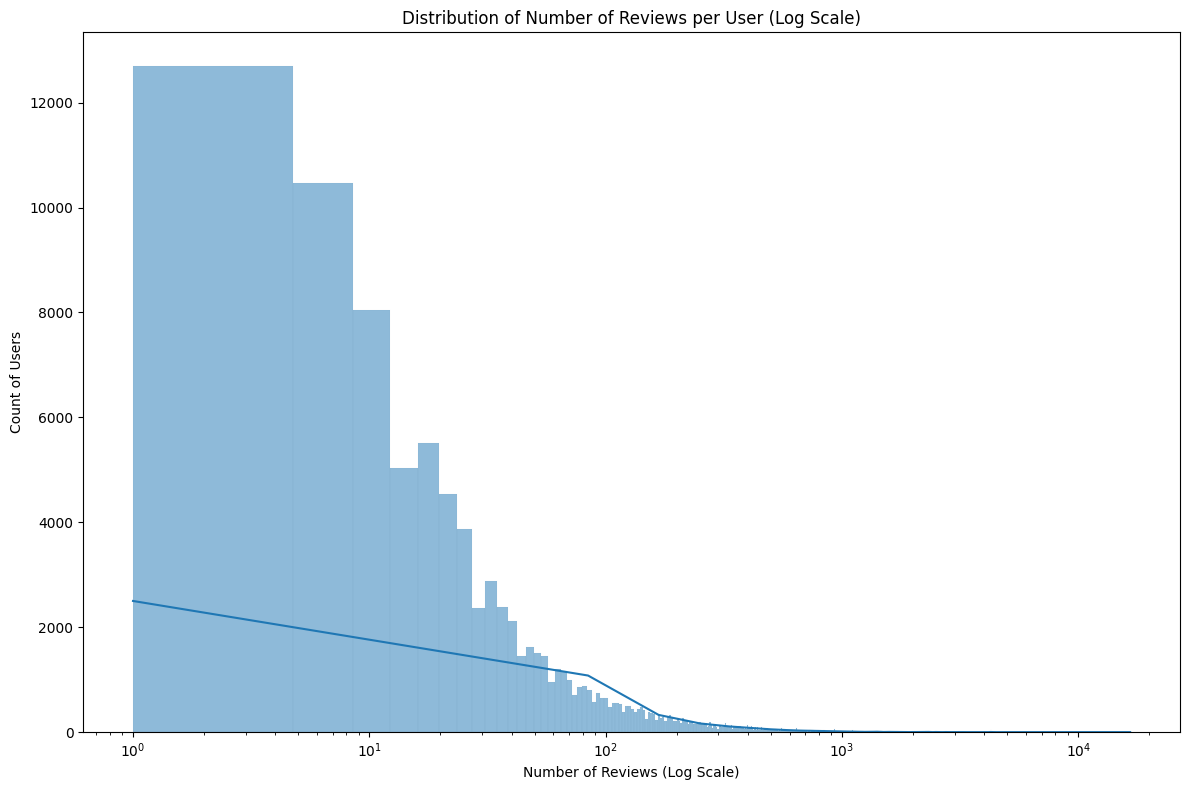

count    100000.000000
mean        121.443680
std         335.884257
min           1.000000
25%           9.000000
50%          27.000000
75%          96.000000
max       16567.000000
Name: review_count_user, dtype: float64

Median number of reviews per user: 27.0
Mode (most common) number of reviews per user: 2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your merged dataframe
# If not, uncomment and modify the following line:
# df = pd.read_csv('your_merged_data.csv')

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Histogram
sns.histplot(data=df, x='review_count_user', ax=ax, kde=True)
ax.set_xscale('log')
ax.set_title('Distribution of Number of Reviews per User (Log Scale)')
ax.set_xlabel('Number of Reviews (Log Scale)')
ax.set_ylabel('Count of Users')

plt.tight_layout()
plt.show()

# Print some statistics
print(df['review_count_user'].describe())
print(f"\nMedian number of reviews per user: {df['review_count_user'].median()}")
print(f"Mode (most common) number of reviews per user: {df['review_count_user'].mode().values[0]}")

สำรวจการแจกแจงของจำนวนรีวิวและจำนวนดาวที่แต่ละ business ได้รับ

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

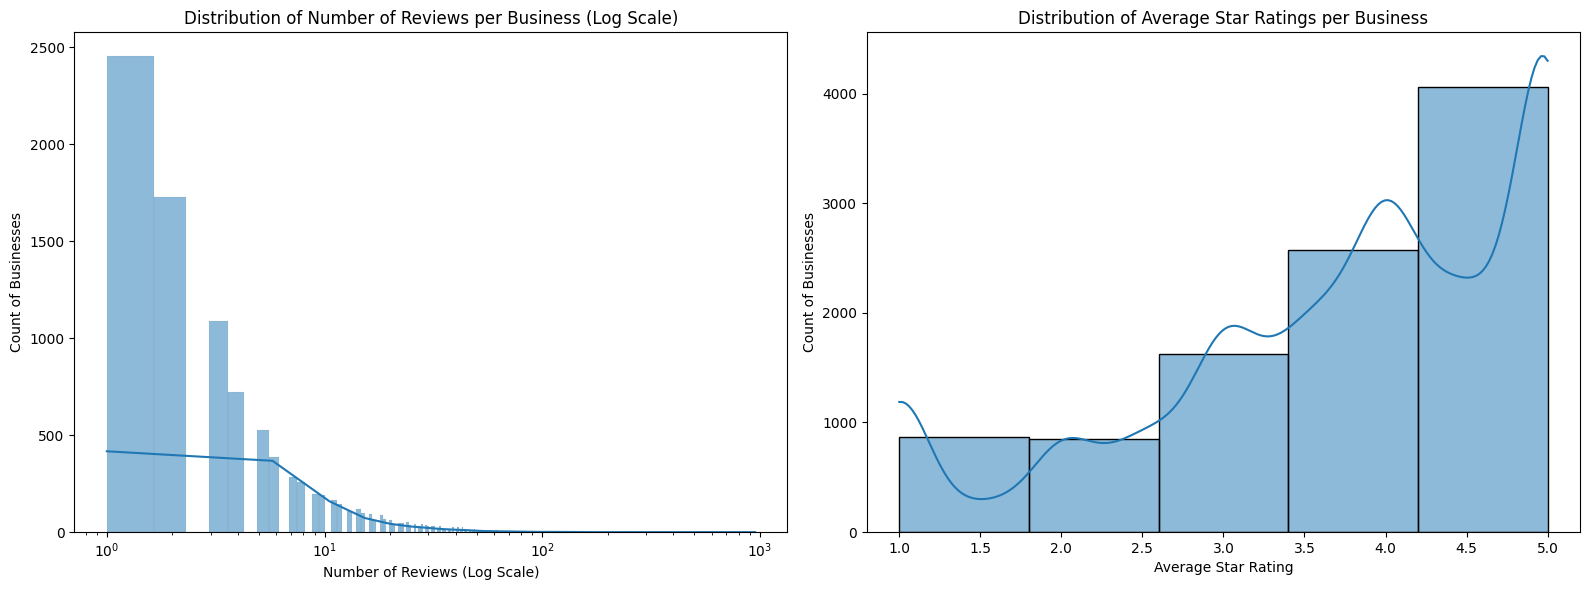

count    9973.000000
mean       10.027073
std        24.698496
min         1.000000
25%         2.000000
50%         3.000000
75%         9.000000
max       950.000000
Name: review_count, dtype: float64

Median number of reviews per business: 3.0
Mode (most common) number of reviews per business: 1
count    9973.000000
mean        3.718169
std         1.176949
min         1.000000
25%         3.000000
50%         4.000000
75%         4.750000
max         5.000000
Name: avg_stars, dtype: float64

Median average stars per business: 4.0
Mode (most common) average stars per business: 5.0


In [ ]:
# prompt: สำรวจการแจกแจงของจำนวนรีวิวและจำนวนดาวที่แต่ละ business ได้รับ

# Assuming df is your merged dataframe
# If not, uncomment and modify the following line:
# df = pd.read_csv('your_merged_data.csv')

# Group by business ID and count reviews and calculate average stars
business_stats = df.groupby('business_id').agg({'review_id': 'count', 'stars_review': 'mean'})
business_stats = business_stats.rename(columns={'review_id': 'review_count', 'stars_review': 'avg_stars'})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of review count
sns.histplot(data=business_stats, x='review_count', ax=axes[0], kde=True)
axes[0].set_xscale('log')
axes[0].set_title('Distribution of Number of Reviews per Business (Log Scale)')
axes[0].set_xlabel('Number of Reviews (Log Scale)')
axes[0].set_ylabel('Count of Businesses')

# Histogram of average stars
sns.histplot(data=business_stats, x='avg_stars', ax=axes[1], kde=True, bins=5)
axes[1].set_title('Distribution of Average Star Ratings per Business')
axes[1].set_xlabel('Average Star Rating')
axes[1].set_ylabel('Count of Businesses')

plt.tight_layout()
plt.show()

# Print some statistics
print(business_stats['review_count'].describe())
print(f"\nMedian number of reviews per business: {business_stats['review_count'].median()}")
print(f"Mode (most common) number of reviews per business: {business_stats['review_count'].mode().values[0]}")

print(business_stats['avg_stars'].describe())
print(f"\nMedian average stars per business: {business_stats['avg_stars'].median()}")
print(f"Mode (most common) average stars per business: {business_stats['avg_stars'].mode().values[0]}")


มีธุรกิจกี่แบบ และธุรกิจในแต่ละแบบมีจำนวนเท่าไหร่

* ลองแยก `categories` ออกเป็น category ย่อย แล้วสามารถนับหรือใช้ฟังก์ชัน Counter `from collections import Counter` ในการนับจำนวนหรือความถี่ของธุรกิจแต่ละแบบ \
ตัวอย่าง https://www.geeksforgeeks.org/counters-in-python-set-1/

In [ ]:
# Assuming 'df' is your merged DataFrame with 'categories' column

# Create a list to store all categories
all_categories = []
for categories in df['categories'].dropna():  # Handle potential missing values
  for category in categories.split(', '):
    all_categories.append(category)

# Use Counter to count the frequency of each category
category_counts = Counter(all_categories)

# Count the number of unique categories
unique_categories_count = len(set(all_categories))
print(f"Total number of unique categories: {unique_categories_count}")
# Display the top 10 most frequent categories
print("Top 10 most frequent business categories:")
for category, count in category_counts.most_common():
  print(f"{category}: {count}")

# Alternatively, you can create a DataFrame for better visualization
category_df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['Count'])
category_df = category_df.sort_values('Count', ascending=False)
category_df

Total number of unique categories: 980
Top 10 most frequent business categories:
Restaurants: 72124
Food: 29650
Nightlife: 23298
Bars: 21927
American (New): 16538
American (Traditional): 14200
Breakfast & Brunch: 13984
Sandwiches: 10015
Event Planning & Services: 9954
Seafood: 7950
Coffee & Tea: 7824
Pizza: 7245
Burgers: 7194
Mexican: 6748
Italian: 6572
Shopping: 6200
Hotels & Travel: 6034
Arts & Entertainment: 5790
Cafes: 5412
Cocktail Bars: 5096
Beauty & Spas: 4887
Salad: 4632
Hotels: 4272
Cajun/Creole: 4129
Specialty Food: 3912
Venues & Event Spaces: 3809
Sushi Bars: 3642
Pubs: 3557
Beer: 3516
Wine & Spirits: 3516
Bakeries: 3475
Japanese: 3454
Desserts: 3336
Caterers: 3072
Chinese: 3030
Southern: 2984
Fast Food: 2887
Ice Cream & Frozen Yogurt: 2872
Sports Bars: 2861
Barbeque: 2739
Steakhouses: 2734
Active Life: 2529
Wine Bars: 2514
Vegetarian: 2511
Automotive: 2355
Asian Fusion: 2353
Diners: 2181
Juice Bars & Smoothies: 2110
Lounges: 2073
Thai: 2070
Music Venues: 2065
Local Services

,Count
Restaurants,72124
Food,29650
Nightlife,23298
Bars,21927
American (New),16538
...,...
Real Estate Photography,1
Addiction Medicine,1
Wallpapering,1
Business Consulting,1


### ต้องการหาว่าในรัฐ Florida มีธุรกิจประเภทใดบ้าง

วัตถุประสงค์ที่ศึกษา
เนื่องจากว่าในรัฐ Florida มีการกระจุกตัวของธุรกิจมากที่สุด

In [ ]:
# นับจำนวนธุรกิจในแต่ละรัฐ
state_counts = businesses['state'].value_counts()
state_counts

,count
state,
PA,34039
FL,26330
TN,12056
IN,11247
MO,10913
LA,9924
AZ,9912
NJ,8536
NV,7715


In [ ]:
# นับจำนวนธุรกิจในแต่ละเมือง
city_counts = businesses['city'].value_counts()
city_counts

,count
city,
Philadelphia,14569
Tucson,9250
Tampa,9050
Indianapolis,7540
Nashville,6971
...,...
Gentilly,1
pennsauken,1
Hamiltion,1


In [ ]:
import plotly.express as px

In [ ]:
color_continuous_scale=['#8ce4e6', '#41b8d5', '#2d8bba', '#2f5f98']
fig = px.choropleth(state_counts,
                    locations=state_counts.index,
                    locationmode="USA-states",
                    color='count',
                    color_continuous_scale=color_continuous_scale,
                    scope="usa",
                    title="การกระจายตัวของธุรกิจในแต่ละรัฐ")

# แสดงแผนที่
fig.show()

In [ ]:
# Adjust the path to your file as necessary
file_path = '/content/drive/MyDrive/Data Warehouse/yelp_dataset/yelp_academic_dataset_business.json'
data = pd.read_json(file_path, lines=True)

In [ ]:
# Filter businesses to only include restaurants in FL
data = data[data['categories'].str.contains('Restaurants', na=False)]
pa_data = data[data['state'] == 'PA']

# Extract primary category from the categories list
pa_data.loc[:, 'primary_category'] = pa_data['categories'].apply(lambda x: x.split(', ')[0])

pa_counts = pa_data['primary_category'].value_counts().nlargest(10)

<ipython-input-85-12de9bfc7036>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



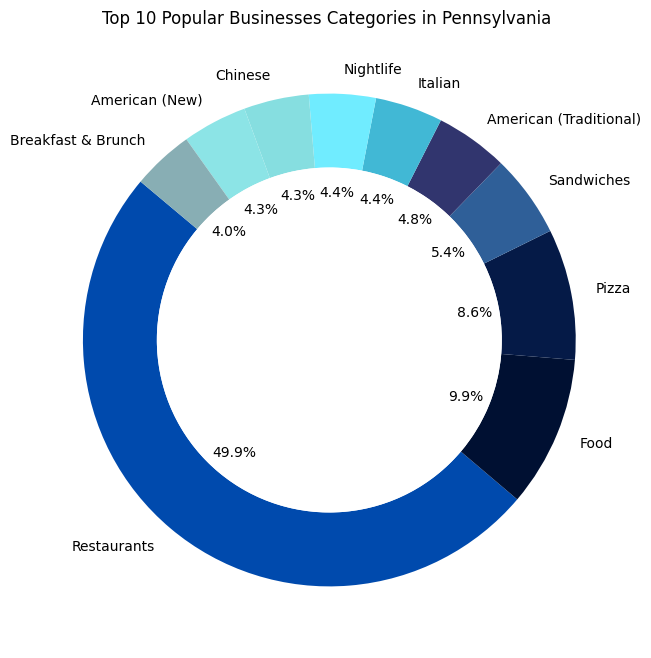

In [ ]:
import matplotlib.pyplot as plt

# Sample data
pa_counts = pa_counts

# Define custom colors
colors = ['#004aad','#001032','#051a47','#2f5f98','#31356e',
          '#41b8d5','#70ecff','#86dee0','#8ce4e6','#88aeb4']

# Create the pie chart with custom colors and a donut shape
plt.figure(figsize=(8, 8))
plt.pie(pa_counts, labels=pa_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3}, colors=colors)

# Add a white circle in the middle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set the title
plt.title('Top 10 Popular Businesses Categories in Pennsylvania ')

# Save and show the plot
plt.savefig('top_pa__businesses_categories_donut.png')
plt.show()


## Problem 3: Retrieving Data from Internet

ให้แต่ละกลุ่มคิดหัวข้อที่สนใจ และทำการดึงข้อมูลเกี่ยวกับหัวข้อที่สนใจผ่าน url ด้วยฟังก์ชัน `urllib.request.urlopen` จากแหล่งข้อมูลออนไลน์อย่างน้อย 10 แห่ง รวบรวมข้อมูลให้เป็นหนึ่งเดียว
> หัวข้อที่สนใจ: อยากทราบว่ากระบวนการของการผลิตยาเป็นอย่างไร

In [ ]:
#----------------------------------------------
# Your code starts here
import urllib.request
from bs4 import BeautifulSoup
import re

In [ ]:
urls = [ "https://en.wikipedia.org/wiki/Drug",
         "https://en.wikipedia.org/wiki/List_of_pharmaceutical_companies",
         "https://en.wikipedia.org/wiki/Pharmaceutical_industry",
         "https://en.wikipedia.org/wiki/Drug_discovery",
         "https://en.wikipedia.org/wiki/Pharmaceutical_marketing",
         "https://en.wikipedia.org/wiki/Drug_development",
         "https://en.wikipedia.org/wiki/Cost_of_drug_development",
         "https://en.wikipedia.org/wiki/Clinical_trial",
         "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3382018/",
         "https://academic.oup.com/bioinformatics/article/31/12/2007/214330",
         "https://nida.nih.gov/research-topics/commonly-used-drugs-charts",
         "https://www.gov.je/Health/AlcoholDrugs/pages/drugseffects.aspx",
         "https://medlineplus.gov/healthstatistics.html",
         "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9481370/",
         "https://www.cdc.gov/chronic-disease/data-research/facts-stats/index.html",
         "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5876976/",
         "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10173933/",
         "https://www.cbo.gov/publication/57126",
         "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5603895/",
         "https://bmchealthservres.biomedcentral.com/articles/10.1186/1472-6963-14-469",
         "https://www.patheon.com/us/en/insights-resources/blog/drug-development-phases.html",
         "https://www.moravek.com/factors-to-consider-when-bringing-a-new-drug-to-the-market/",
         "https://www.scientificamerican.com/article/when-choosing-what-diseases-to-develop-drugs-for-it-all-comes-down-to-funding/" ,
         "https://www.altasciences.com/resource-center/blog/impact-social-factors-drug-development#:~:text=Drug%20development%20continues%20to%20be,%2C%20optimal%20choices%2C%20and%20speed" ]

# Function to scrape content from a single URL
def scrape_url(url):
    try:
        # Set a user-agent header to mimic a browser request
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
        req = urllib.request.Request(url, headers=headers)

        # Open the URL
        response = urllib.request.urlopen(req)
        html = response.read().decode('utf-8')

        # Parse the HTML
        soup = BeautifulSoup(html, 'html.parser')

        # Extract all text from the page
        text = soup.get_text()

        # Clean the text by removing excessive whitespace
        clean_text = re.sub(r'\s+', ' ', text).strip()

        return clean_text
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return ""

# Initialize an empty list to store scraped data
scraped_data = []

# Loop through all URLs and scrape data
for url in urls:
    print(f"Scraping: {url}")
    data = scrape_url(url)
    scraped_data.append(data)

# Combine all scraped data into a single text corpus
combined_data = ' '.join(scraped_data)

# Output a small snippet of the combined data for verification
print(combined_data[:1000])  # Print the first 1000 characters

# Optionally, save the combined data to a text file
with open("data.txt", "w", encoding="utf-8") as f:
    f.write(combined_data)

print("\nData scraping and integration completed!")

Scraping: https://en.wikipedia.org/wiki/Drug
Scraping: https://en.wikipedia.org/wiki/List_of_pharmaceutical_companies
Scraping: https://en.wikipedia.org/wiki/Pharmaceutical_industry
Scraping: https://en.wikipedia.org/wiki/Drug_discovery
Scraping: https://en.wikipedia.org/wiki/Pharmaceutical_marketing
Scraping: https://en.wikipedia.org/wiki/Drug_development
Scraping: https://en.wikipedia.org/wiki/Cost_of_drug_development
Scraping: https://en.wikipedia.org/wiki/Clinical_trial
Scraping: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3382018/
Scraping: https://academic.oup.com/bioinformatics/article/31/12/2007/214330
Scraping: https://nida.nih.gov/research-topics/commonly-used-drugs-charts
Scraping: https://www.gov.je/Health/AlcoholDrugs/pages/drugseffects.aspx
Scraping: https://medlineplus.gov/healthstatistics.html
Scraping: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9481370/
Scraping: https://www.cdc.gov/chronic-disease/data-research/facts-stats/index.html
Scraping: https://www.ncbi.nlm.

In [ ]:
combined_data[:1000]

'Drug - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn to editCommunity portalRecent changesUpload file Search Search Appearance Create account Log in Personal tools Create account Log in Pages for logged out editors learn more ContributionsTalk Contents move to sidebar hide (Top) 1 Classification 2 Etymology 3 Efficacy 4 Medication 5 Spiritual and religious use 6 Smart drugs and designer drugs 7 Recreational drug use 8 Administration of drugs 9 Control of drugs 10 See also Toggle See also subsection 10.1 Lists of drugs 11 References 12 Further reading 13 External links Toggle the table of contents Drug 93 languages AfrikaansAlemannischአማርኛالعربيةAsturianuAzərbaycancaتۆرکجهবাংলা閩南語 / Bân-lâm-gúBikol CentralБългарскиBosanskiBrezhonegCatalàCymraegDanskDeutschEestiEspañolEsperantoEuskaraفارسیFøroysktFrançaisFryskGaeilgeGalego한국어HausaՀայերենहिन्दीIdoBahasa Indone

เตรียมข้อมูลและทำความสะอาดข้อมูลด้วยการทำ lower case, tokenization, removing stopwords (as well as punctuations, unrelated symbols, etc.), stemming, lemmatization เป็นต้น

In [ ]:
#----------------------------------------------
# Your code starts here
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and unrelated symbols
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    # Add additional stopwords
    additional_stopwords = {'also', 'includ','the', 'and', 'a', 'et', 'all'}
    stop_words.update(additional_stopwords)
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string, separated by spaces
    cleaned_text = ' '.join(lemmatized_tokens)

    return cleaned_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
cleaned_text = clean_text(combined_data)
cleaned_text

'drug wikipedia jump content main menu main menu move sidebar hide navigation main pagecontentscurrent eventsrandom articleabout wikipediacontact usdonate contribute helplearn editcommunity portalrecent changesupload file search search appearance create account log personal tool create account log page logged editor learn contributionstalk content move sidebar hide top 1 classification 2 etymology 3 efficacy 4 medication 5 spiritual religious use 6 smart drug designer drug 7 recreational drug use 8 administration drug 9 control drug 10 see toggle see subsection 101 list drug 11 reference 12 reading 13 external link toggle table content drug 93 language afrikaansalemannischአማርኛالعربيةasturianuazərbaycancaتۆرکجهবল閩南語 bânlâmgúbikol centralбългарскиbosanskibrezhonegcatalàcymraegdanskdeutscheestiespañolesperantoeuskaraفارسیføroysktfrançaisfryskgaeilgegalego한국어hausaհայերենहनदidobahasa indonesiainterlinguaisizuluitalianoעבריתjawaಕನನಡქართულიkiswahilikreyòl ayisyenkriyòl gwiyannenkurdîlatinalat

Text Mining: ทำการวิเคราะห์ข้อความที่รวบรวมมาได้ พร้อมทั้งแสดงการนำเสนอที่สร้างสรรค์

In [ ]:
#----------------------------------------------
# Your code starts here
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word frequency analysis
word_freq = Counter(cleaned_text.split())
top_words = word_freq.most_common(10)

print("Top 10 most frequent words:")
for word, count in top_words:
    print(f"{word}: {count}")

Top 10 most frequent words:
drug: 2550
trial: 909
new: 875
clinical: 851
pharmaceutical: 614
health: 580
study: 551
research: 497
company: 464
development: 435


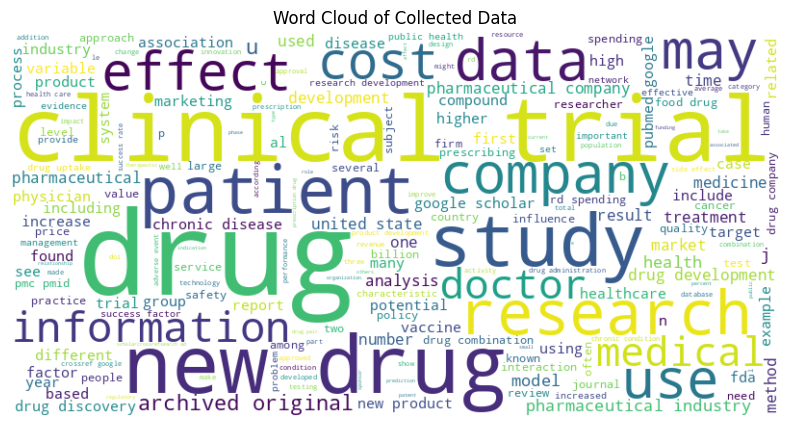

In [ ]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Collected Data')
plt.show()

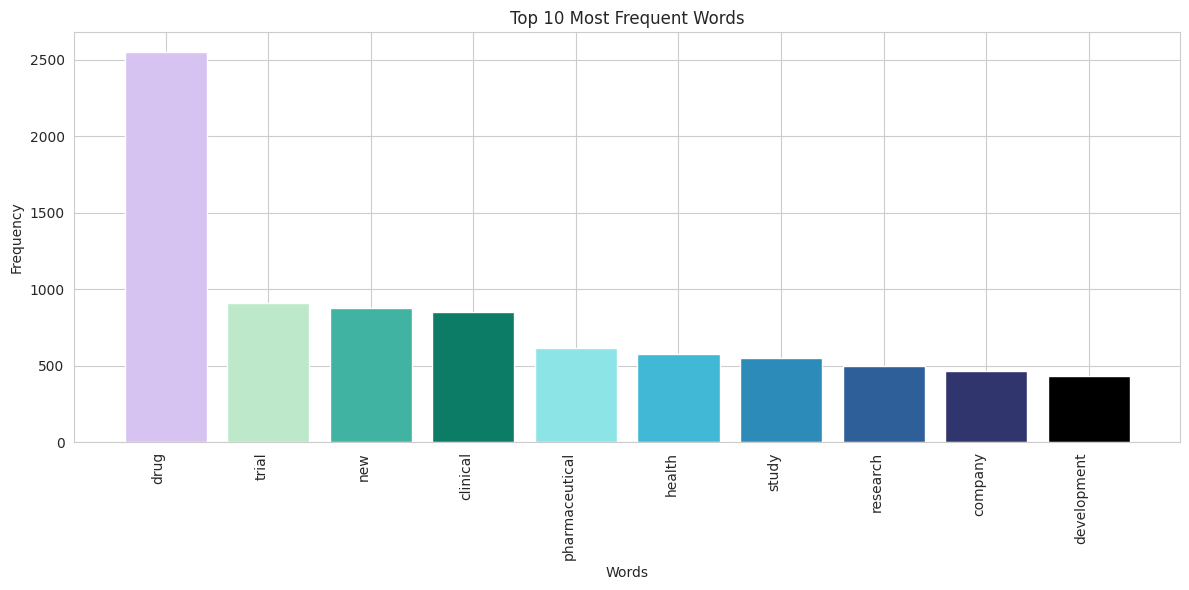

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

color=[ '#D7C3F1', '#BDE8CA', '#41B3A2', '#0D7C66' ,'#8ce4e6', '#41b8d5', '#2d8bba', '#2f5f98', '#31356e', '#000000']

def plot_top_words(text, n=10):
    # Count word frequencies
    word_freq = Counter(text.split())
    top_words = word_freq.most_common(n)

    # Prepare data for plotting
    words, counts = zip(*top_words)

    # Create bar chart
    plt.figure(figsize=(12, 6))
    # Use a single color for all bars
    plt.bar(words, counts, color=color)
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation = 90, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Usage:
plot_top_words(cleaned_text)

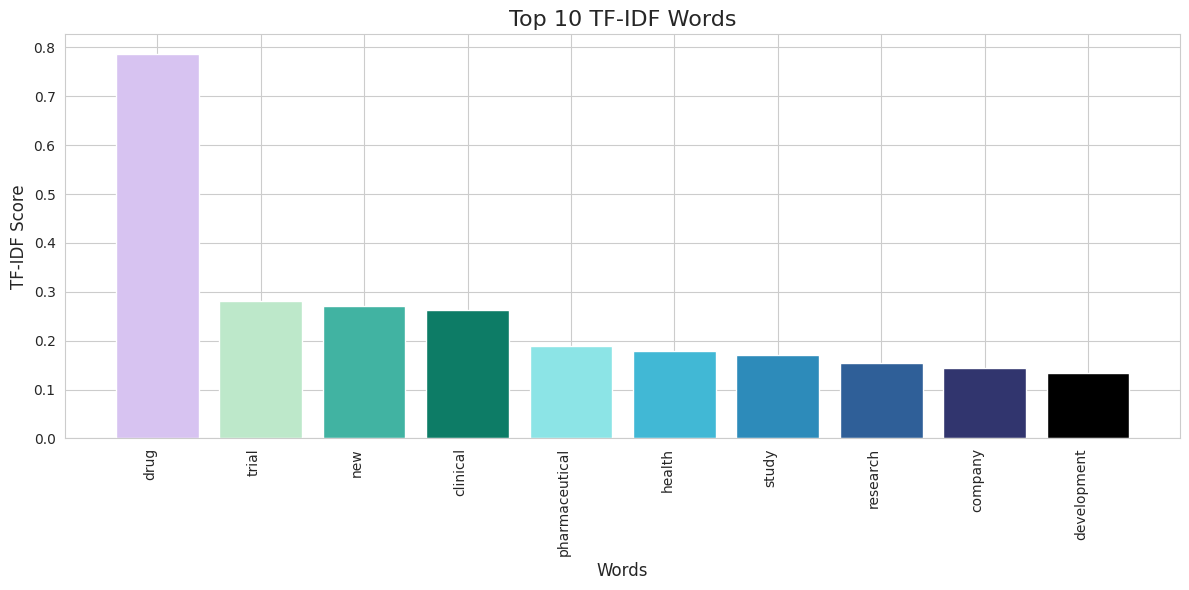

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# สีที่ต้องการใช้สำหรับกราฟ
color = ['#D7C3F1', '#BDE8CA', '#41B3A2', '#0D7C66', '#8ce4e6', '#41b8d5', '#2d8bba', '#2f5f98', '#31356e', '#000000']

# ฟังก์ชันสำหรับสร้างกราฟ TF-IDF ที่มีลักษณะเหมือนที่ต้องการ
def plot_tfidf_words(tfidf_scores, n=10):
    # เตรียมข้อมูลสำหรับการแสดงผล
    words, scores = zip(*sorted(tfidf_scores.items(), key=lambda item: item[1], reverse=True)[:n])

    # สร้างกราฟแท่ง
    plt.figure(figsize=(12, 6))
    plt.bar(words, scores, color=color[:n])  # ใช้สีจากลิสต์
    plt.title(f'Top {n} TF-IDF Words', fontsize=16)
    plt.xlabel('Words', fontsize=12)
    plt.ylabel('TF-IDF Score', fontsize=12)

    # หมุนแกน X และจัดวางให้อ่านง่ายขึ้น
    plt.xticks(rotation=90, ha='right')

    # ทำให้กราฟแสดงผลสวยงามขึ้น
    plt.tight_layout()
    plt.show()

# เรียกใช้งานฟังก์ชัน
plot_tfidf_words(tfidf_scores)


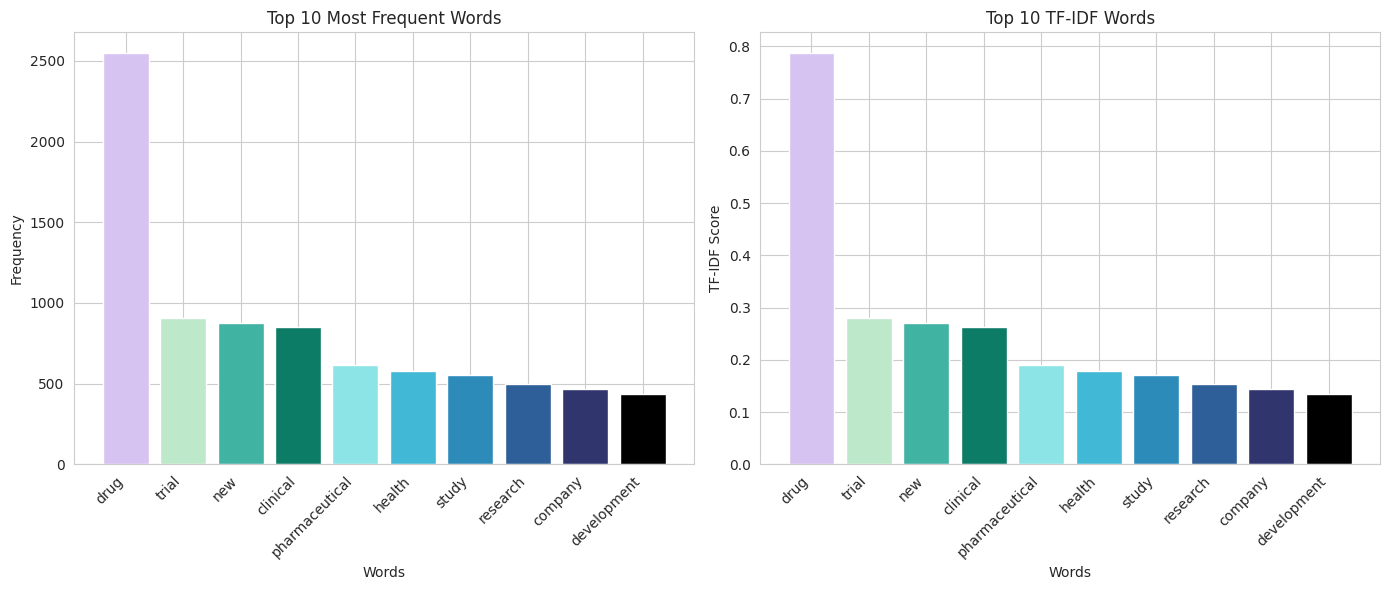

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

color = ['#D7C3F1', '#BDE8CA', '#41B3A2', '#0D7C66', '#8ce4e6', '#41b8d5', '#2d8bba', '#2f5f98', '#31356e', '#000000']

# ฟังก์ชันสำหรับสร้างกราฟการกระจายคำที่พบมากที่สุด
def plot_top_words(text, n=10):
    # Count word frequencies
    word_freq = Counter(text.split())
    top_words = word_freq.most_common(n)

    # Prepare data for plotting
    words, counts = zip(*top_words)

    return words, counts

# ฟังก์ชันสำหรับสร้างกราฟ TF-IDF
def plot_tfidf_words(tfidf_scores, n=10):
    # เตรียมข้อมูลสำหรับการแสดงผล
    words, scores = zip(*sorted(tfidf_scores.items(), key=lambda item: item[1], reverse=True)[:n])

    return words, scores

# ข้อมูลที่ใช้
words_freq, counts_freq = plot_top_words(cleaned_text)
words_tfidf, scores_tfidf = plot_tfidf_words(tfidf_scores)

# ตั้งค่าการแสดงผลหลายกราฟในภาพเดียวกัน
plt.figure(figsize=(14, 6))

# แสดงกราฟการกระจายคำที่พบมากที่สุด
plt.subplot(1, 2, 1)
plt.bar(words_freq, counts_freq, color=color[:len(words_freq)])
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# แสดงกราฟ TF-IDF
plt.subplot(1, 2, 2)
plt.bar(words_tfidf, scores_tfidf, color=color[:len(words_tfidf)])
plt.title('Top 10 TF-IDF Words')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.tight_layout()
plt.show()


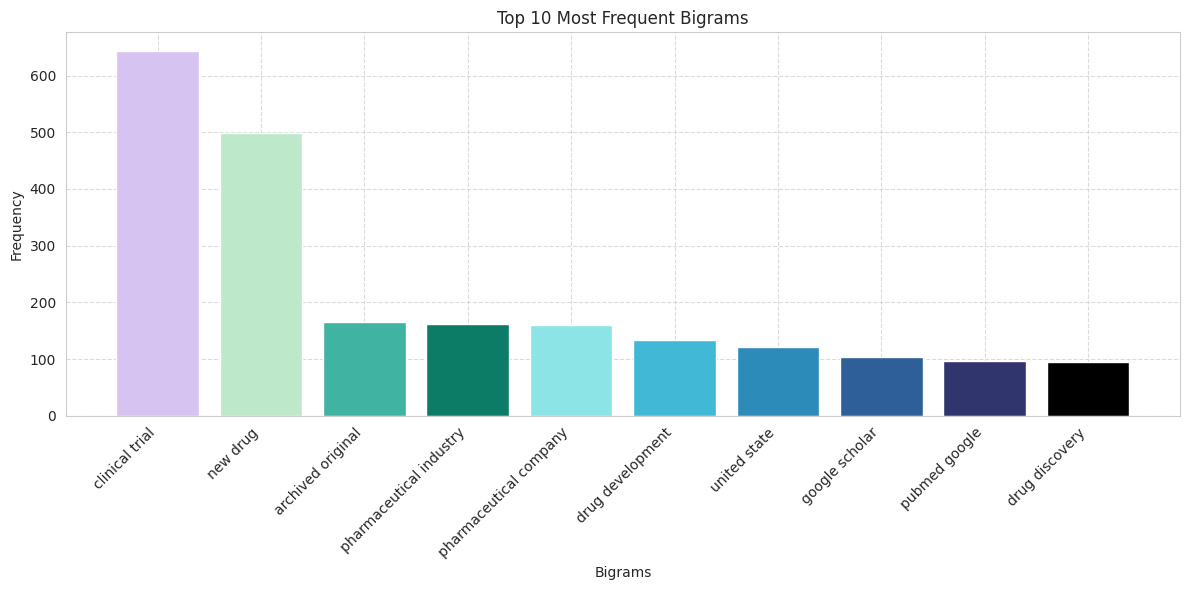

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter

# สีที่ต้องการใช้สำหรับกราฟ
color = ['#D7C3F1', '#BDE8CA', '#41B3A2', '#0D7C66', '#8ce4e6', '#41b8d5', '#2d8bba', '#2f5f98', '#31356e', '#000000']

def plot_top_bigrams(text, n=10):
    # กำหนดให้สร้าง bigram (ngram_range=(2, 2))
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    X = vectorizer.fit_transform([text])

    # นับความถี่ของแต่ละ bigram
    bigram_counts = X.toarray().sum(axis=0)
    bigram_features = vectorizer.get_feature_names_out()

    # สร้าง dictionary สำหรับ bigrams และความถี่
    bigram_freq = dict(zip(bigram_features, bigram_counts))

    # นำ bigrams ที่มีความถี่สูงสุด n มาแสดง
    top_bigrams = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)[:n]
    bigrams, counts = zip(*top_bigrams)

    # เตรียมข้อมูลสำหรับการแสดงผล
    plt.figure(figsize=(12, 6))

    # สร้างกราฟแท่งและเพิ่มสีที่สวยงาม
    plt.bar(bigrams, counts, color=color[:n])
    plt.title(f'Top {n} Most Frequent Bigrams')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# เรียกใช้งานฟังก์ชันกับ cleaned_text ที่เตรียมไว้
plot_top_bigrams(cleaned_text)


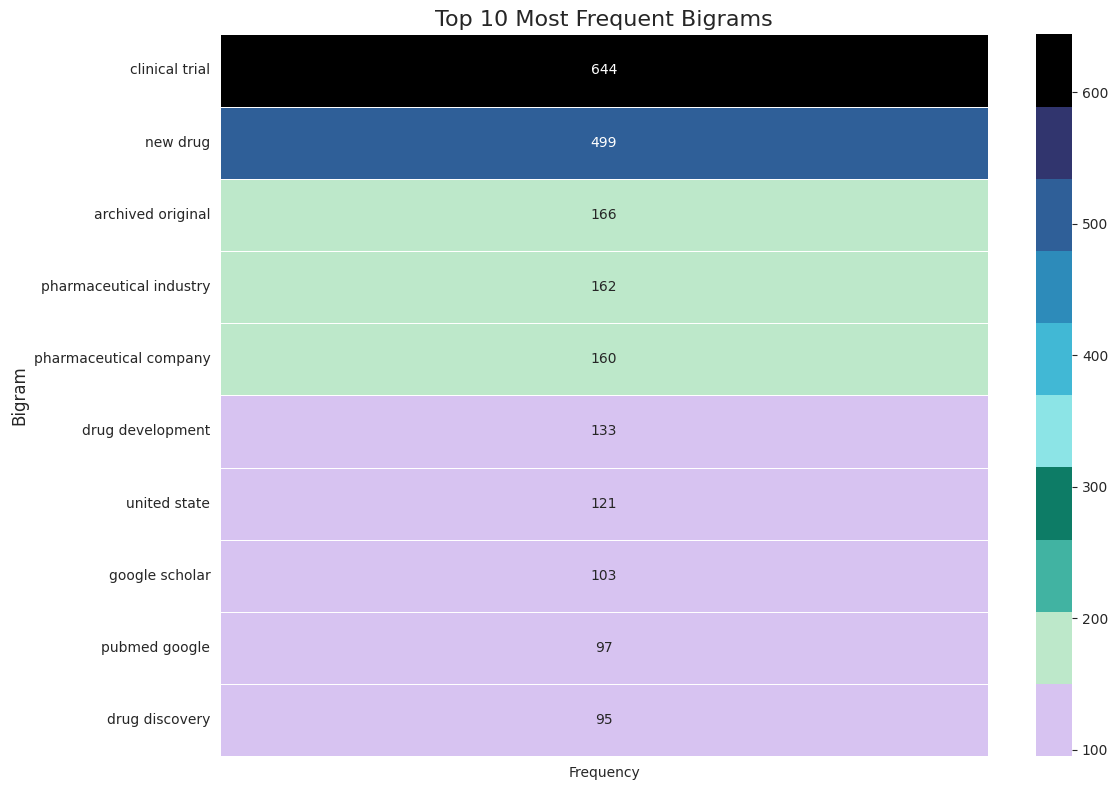

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# สีที่ต้องการใช้สำหรับ heatmap
color_palette = ['#D7C3F1', '#BDE8CA', '#41B3A2', '#0D7C66', '#8ce4e6', '#41b8d5', '#2d8bba', '#2f5f98', '#31356e', '#000000']

def plot_heatmap(text, n=10):
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    X = vectorizer.fit_transform([text])

    bigram_counts = X.toarray().sum(axis=0)
    bigram_features = vectorizer.get_feature_names_out()

    bigram_freq = dict(zip(bigram_features, bigram_counts))

    top_bigrams = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)[:n]
    bigrams, counts = zip(*top_bigrams)

    # สร้าง DataFrame
    data = pd.DataFrame({'Bigram': bigrams, 'Frequency': counts})

    # จัดเรียงข้อมูลใน DataFrame ตามความถี่
    data_sorted = data.sort_values(by='Frequency', ascending=False).set_index('Bigram')

    # สร้าง pivot table และจัดเรียง index ใหม่
    data_pivot = data_sorted.reindex(index=data_sorted.index)

    plt.figure(figsize=(12, 8))

    # สร้าง heatmap และใช้พาเลตสีที่กำหนด
    sns.heatmap(data_pivot, annot=True, cmap=sns.color_palette(color_palette, as_cmap=True), linewidths=.5, fmt='d')
    plt.title(f'Top {n} Most Frequent Bigrams', fontsize=16)
    plt.ylabel('Bigram', fontsize=12)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# เรียกใช้งานฟังก์ชันกับ cleaned_text ที่เตรียมไว้
plot_heatmap(cleaned_text)


-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * ตอบคำถามต่าง ๆ ใน Notebook
    * อธิบายวิธีการที่ใช้ และแสดง screenshots ของผลลัพธ์ที่ได้จาก Python Notebook โดยแสดงภาพและตาราง โดยไม่จำเป็นที่จะต้องนำเสนอ source code

** Note: แต่ละกลุ่มส่งแค่ครั้งเดียว **